EDA

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from math import sqrt
from feature_engine.creation import CyclicalFeatures
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("training.csv")

In [2]:
train_data.head()

Unnamed: 0 creation_date completion_date request_number  outcome  \
0           0    2011-01-01      2011-01-03    11-00002110      NaN   
1          31    2011-01-01      2011-01-05    11-00002353  pothole   
2          32    2011-01-01      2011-01-05    11-00002355  pothole   
3          33    2011-01-01      2011-01-05    11-00003109  pothole   
4          34    2011-01-01      2011-01-05    11-00003242  pothole   

   n_potholes_on_block             address  community_area_number   ssa  \
0                  NaN  7600 S PARNELL AVE                     69   NaN   
1                  4.0    5800 N ODELL AVE                     10   NaN   
2                  1.0  5700 N OCTAVIA AVE                     10   NaN   
3                 14.0    5400 N SAYRE AVE                     10   NaN   
4                  2.0       200 E 47TH ST                     38  56.0   

   avg_traffic  days_open  
0       1200.0          2  
1          NaN          4  
2          NaN          4  
3          NaN          4  
4      20125.0          4

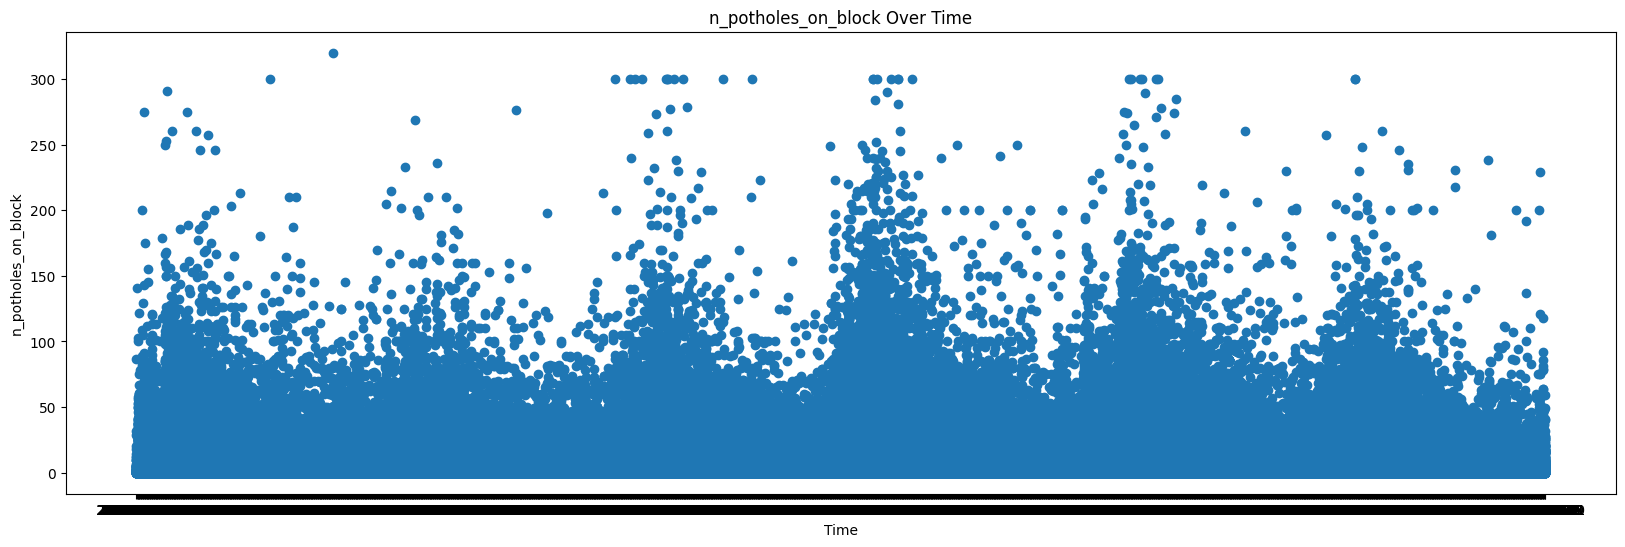

In [3]:
plt.figure(figsize=(20, 6))
plt.scatter(train_data['creation_date'], train_data["n_potholes_on_block"]) 
plt.xlabel('Time')
plt.ylabel('n_potholes_on_block')
plt.title('n_potholes_on_block Over Time')
plt.show()

In [4]:
train_data['creation_date'] = pd.to_datetime(train_data['creation_date'])
train_data['completion_date'] = pd.to_datetime(train_data['completion_date'])

In [5]:
train_data['Year-Month'] = train_data['creation_date'].dt.strftime('%Y-%m')
grouped_data = train_data.groupby(['Year-Month'])['n_potholes_on_block'].sum().reset_index()
grouped_data

Year-Month  n_potholes_on_block
0     2011-01              53399.0
1     2011-02              77671.0
2     2011-03             137673.0
3     2011-04              82453.0
4     2011-05              51856.0
..        ...                  ...
67    2016-08              21549.0
68    2016-09              12653.0
69    2016-10              15401.0
70    2016-11               9521.0
71    2016-12              19529.0

[72 rows x 2 columns]

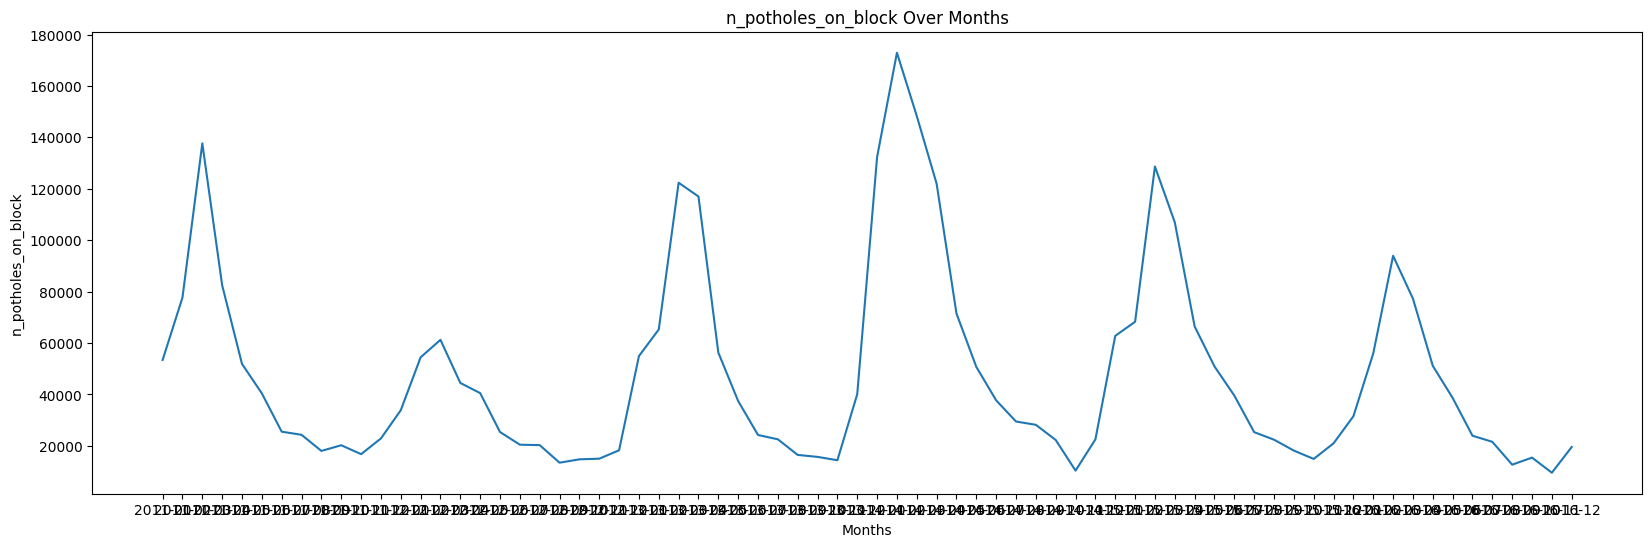

In [6]:
plt.figure(figsize=(20, 6))
plt.plot(grouped_data['Year-Month'], grouped_data["n_potholes_on_block"])
plt.xlabel('Months')
plt.ylabel('n_potholes_on_block')
plt.title('n_potholes_on_block Over Months')
plt.show()

In [7]:
grouped_data1 = train_data.groupby(['community_area_number'])['n_potholes_on_block'].sum().reset_index()
grouped_data1

community_area_number  n_potholes_on_block
0                       0               6811.0
1                       1              39971.0
2                       2              76543.0
3                       3              24650.0
4                       4              27102.0
..                    ...                  ...
73                     73              69062.0
74                     74              30379.0
75                     75              53303.0
76                     76              17038.0
77                     77              28704.0

[78 rows x 2 columns]

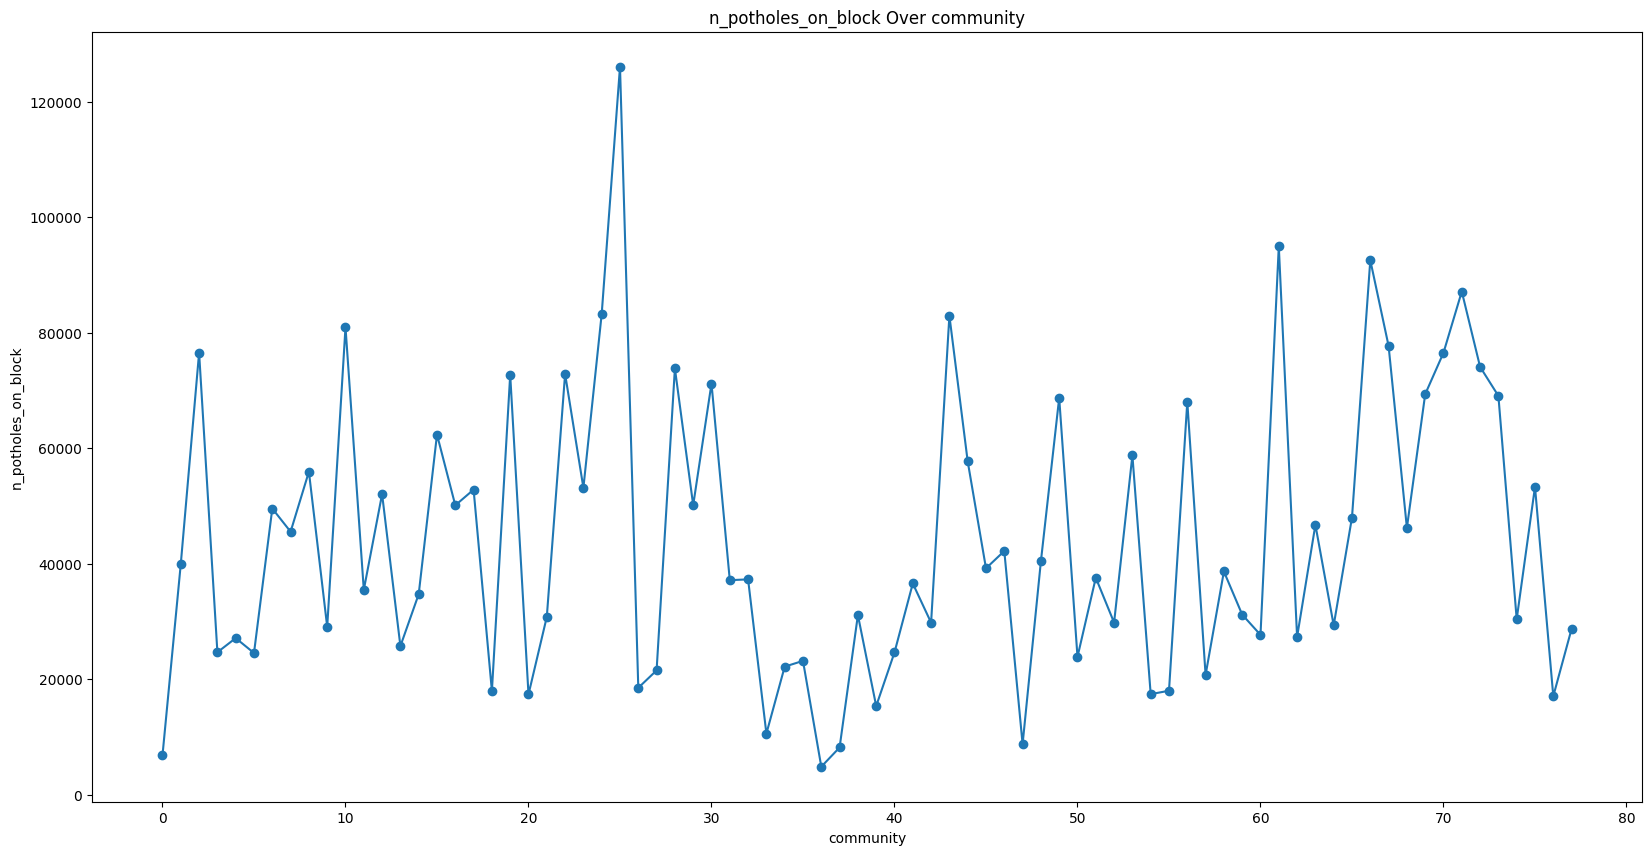

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(grouped_data1['community_area_number'], grouped_data1["n_potholes_on_block"],marker='o', linestyle='-')
plt.xlabel('community')
plt.ylabel('n_potholes_on_block')
plt.title('n_potholes_on_block Over community')
plt.show()

In [9]:
train_data = pd.read_csv("training.csv")
train_data['creation_date'] = pd.to_datetime(train_data['creation_date'])
train_data['completion_date'] = pd.to_datetime(train_data['completion_date'])
train_data['Year-Month'] = train_data['creation_date'].dt.strftime('%Y-%m')
train_data['Year-Month'] = pd.to_datetime(train_data['Year-Month'])
train_data

Unnamed: 0 creation_date completion_date request_number  outcome  \
0                0    2011-01-01      2011-01-03    11-00002110      NaN   
1               31    2011-01-01      2011-01-05    11-00002353  pothole   
2               32    2011-01-01      2011-01-05    11-00002355  pothole   
3               33    2011-01-01      2011-01-05    11-00003109  pothole   
4               34    2011-01-01      2011-01-05    11-00003242  pothole   
...            ...           ...             ...            ...      ...   
437139      434310    2016-12-31      2017-01-04    16-08562001  pothole   
437140      436698    2016-12-31      2017-01-19    16-08564248  pothole   
437141      483393    2016-12-31      2017-10-06    16-08570078      NaN   
437142      436840    2016-12-31      2017-01-20    16-08567973  pothole   
437143      438477    2016-12-31      2017-01-26    16-08563577  pothole   

        n_potholes_on_block                address  community_area_number  \
0                       NaN     7600 S PARNELL AVE                     69   
1                       4.0       5800 N ODELL AVE                     10   
2                       1.0     5700 N OCTAVIA AVE                     10   
3                      14.0       5400 N SAYRE AVE                     10   
4                       2.0          200 E 47TH ST                     38   
...                     ...                    ...                    ...   
437139                  2.0       2500 S DAMEN AVE                     31   
437140                 16.0       1900 W TOUHY AVE                      1   
437141                  NaN          900 S WOOD ST                     28   
437142                 16.0  3900 W IRVING PARK RD                     16   
437143                  2.0    4000 N CAMPBELL AVE                      5   

         ssa  avg_traffic  days_open Year-Month  
0        NaN       1200.0          2 2011-01-01  
1        NaN          NaN          4 2011-01-01  
2        NaN          NaN          4 2011-01-01  
3        NaN          NaN          4 2011-01-01  
4       56.0      20125.0          4 2011-01-01  
...      ...          ...        ...        ...  
437139   NaN      18685.0          4 2016-12-01  
437140   NaN      29450.0         19 2016-12-01  
437141   NaN          NaN        279 2016-12-01  
437142   NaN      36050.0         20 2016-12-01  
437143  38.0          NaN         26 2016-12-01  

[437144 rows x 12 columns]

In [10]:
train_data['Year-Month']

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
437139   2016-12-01
437140   2016-12-01
437141   2016-12-01
437142   2016-12-01
437143   2016-12-01
Name: Year-Month, Length: 437144, dtype: datetime64[ns]

In [11]:
dict = {'Year':train_data['Year-Month'].dt.year, 'Month':train_data['Year-Month'].dt.month}
date_and_time = pd.DataFrame(data=dict)
train_data = pd.concat([train_data, date_and_time], axis=1)
train_data = train_data.drop(columns=['Year-Month'])
train_data

Unnamed: 0 creation_date completion_date request_number  outcome  \
0                0    2011-01-01      2011-01-03    11-00002110      NaN   
1               31    2011-01-01      2011-01-05    11-00002353  pothole   
2               32    2011-01-01      2011-01-05    11-00002355  pothole   
3               33    2011-01-01      2011-01-05    11-00003109  pothole   
4               34    2011-01-01      2011-01-05    11-00003242  pothole   
...            ...           ...             ...            ...      ...   
437139      434310    2016-12-31      2017-01-04    16-08562001  pothole   
437140      436698    2016-12-31      2017-01-19    16-08564248  pothole   
437141      483393    2016-12-31      2017-10-06    16-08570078      NaN   
437142      436840    2016-12-31      2017-01-20    16-08567973  pothole   
437143      438477    2016-12-31      2017-01-26    16-08563577  pothole   

        n_potholes_on_block                address  community_area_number  \
0                       NaN     7600 S PARNELL AVE                     69   
1                       4.0       5800 N ODELL AVE                     10   
2                       1.0     5700 N OCTAVIA AVE                     10   
3                      14.0       5400 N SAYRE AVE                     10   
4                       2.0          200 E 47TH ST                     38   
...                     ...                    ...                    ...   
437139                  2.0       2500 S DAMEN AVE                     31   
437140                 16.0       1900 W TOUHY AVE                      1   
437141                  NaN          900 S WOOD ST                     28   
437142                 16.0  3900 W IRVING PARK RD                     16   
437143                  2.0    4000 N CAMPBELL AVE                      5   

         ssa  avg_traffic  days_open  Year  Month  
0        NaN       1200.0          2  2011      1  
1        NaN          NaN          4  2011      1  
2        NaN          NaN          4  2011      1  
3        NaN          NaN          4  2011      1  
4       56.0      20125.0          4  2011      1  
...      ...          ...        ...   ...    ...  
437139   NaN      18685.0          4  2016     12  
437140   NaN      29450.0         19  2016     12  
437141   NaN          NaN        279  2016     12  
437142   NaN      36050.0         20  2016     12  
437143  38.0          NaN         26  2016     12  

[437144 rows x 13 columns]

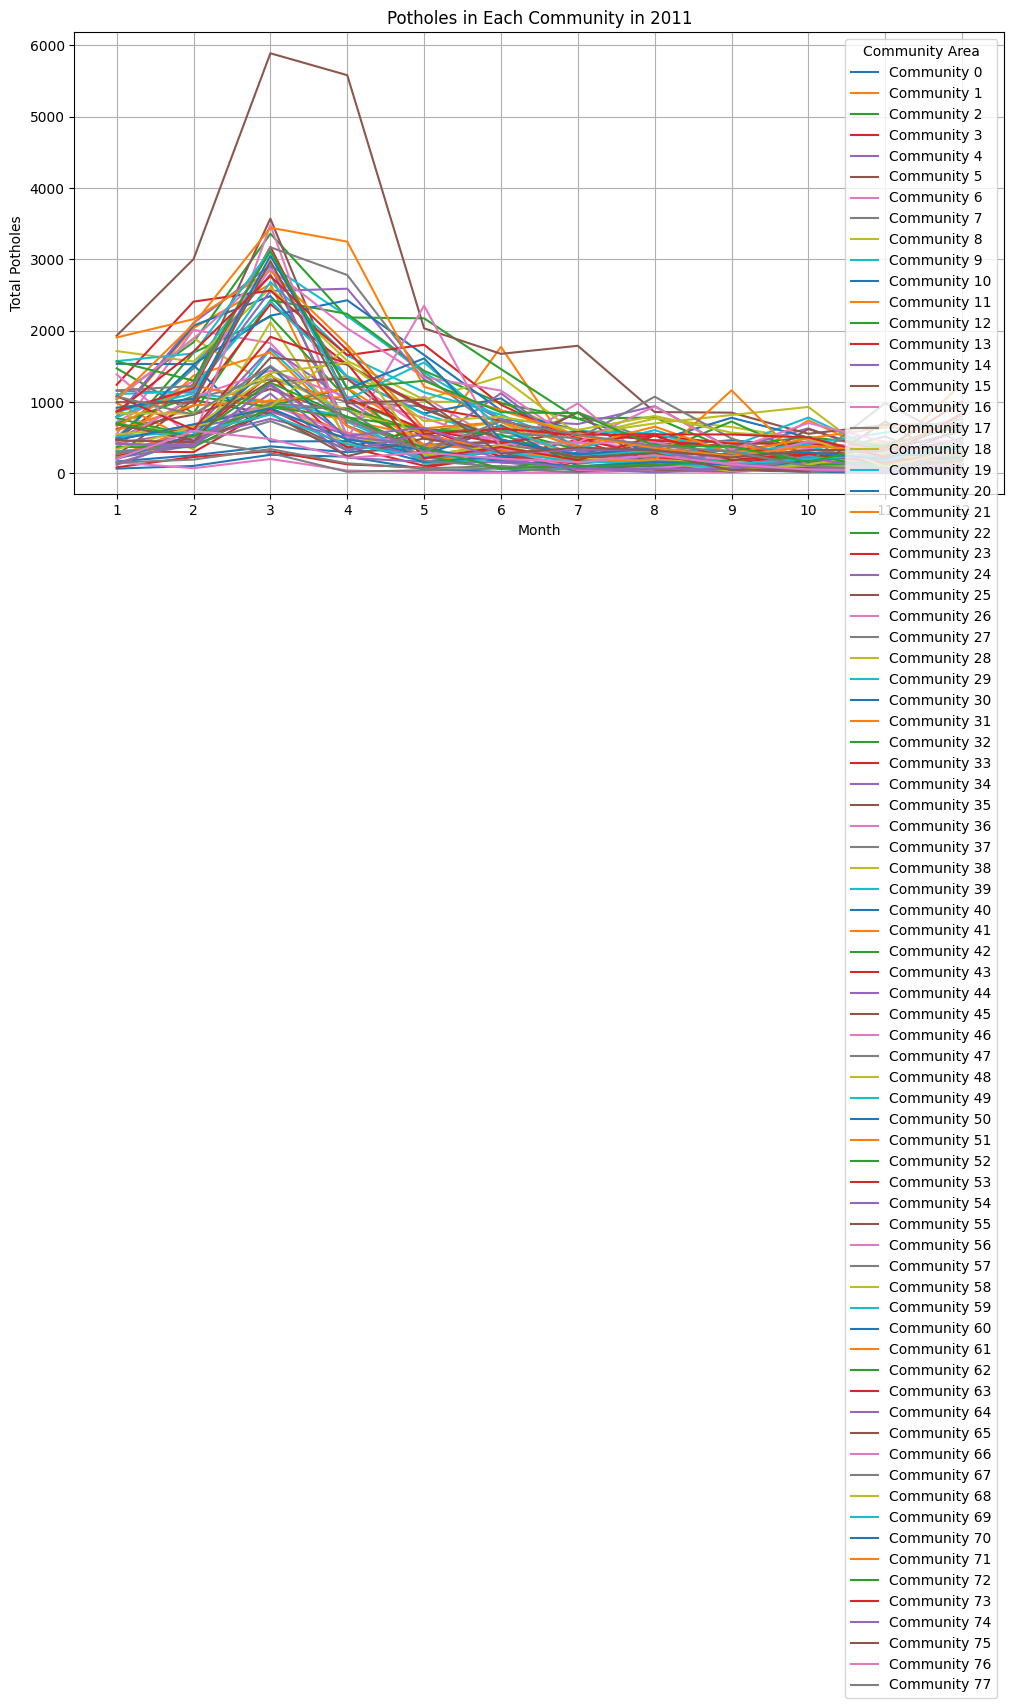

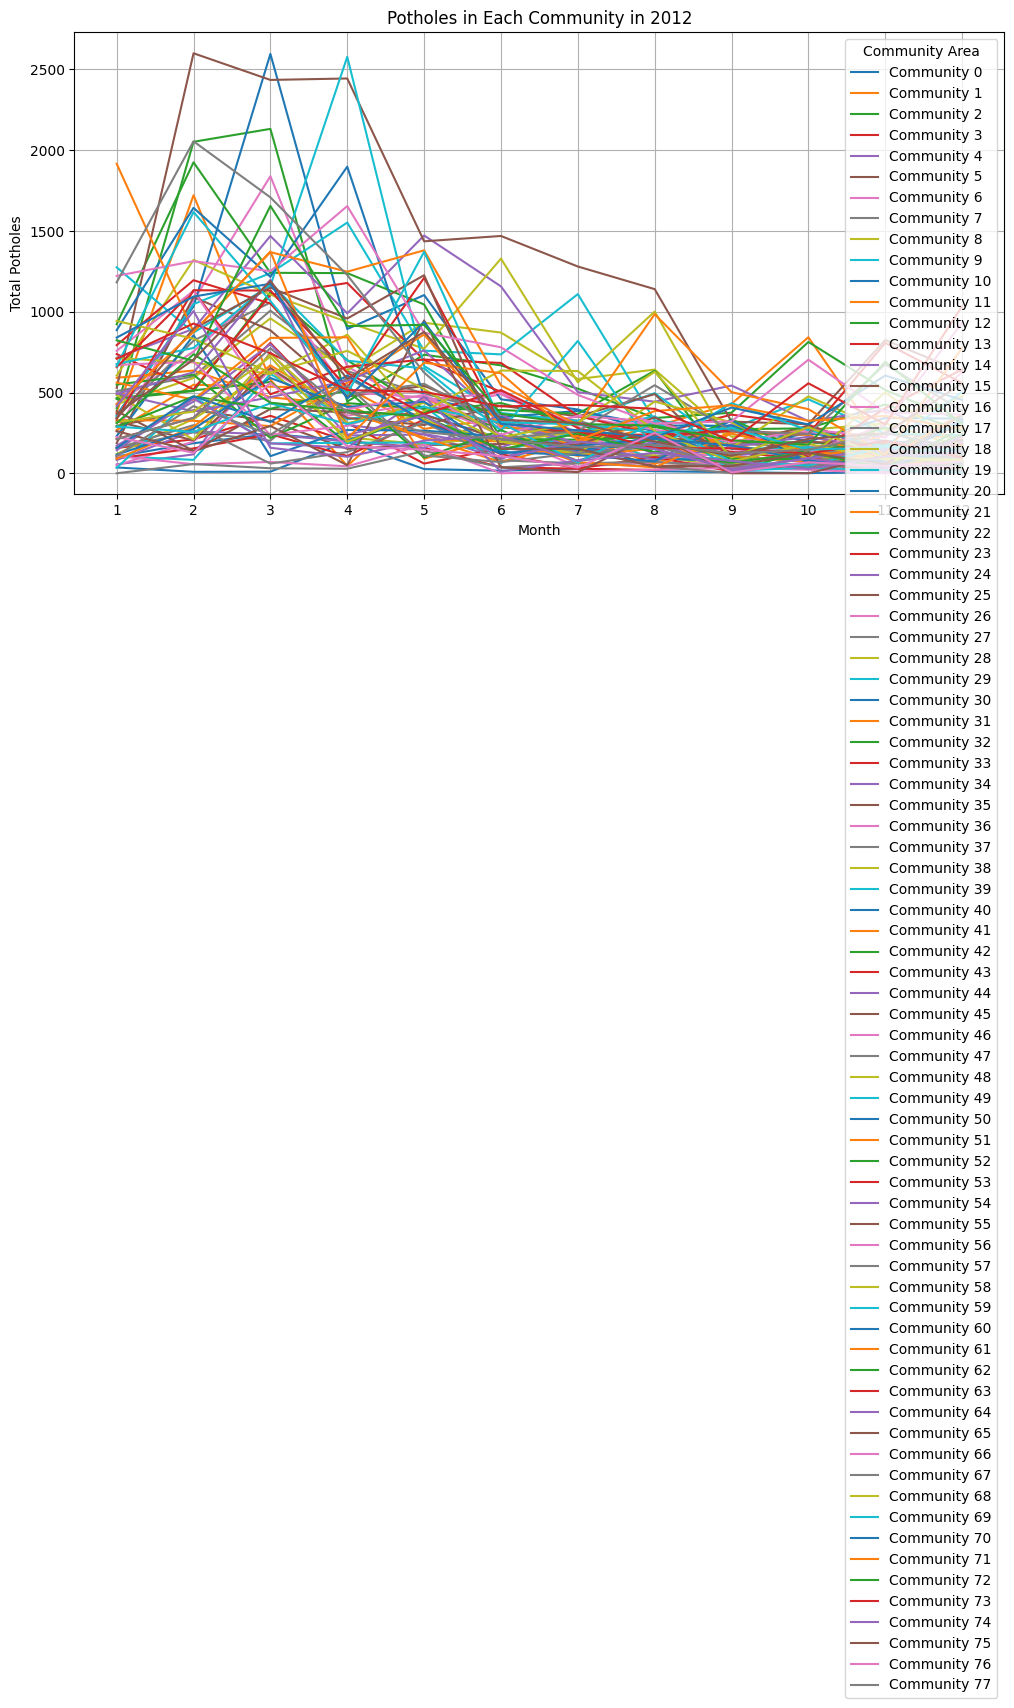

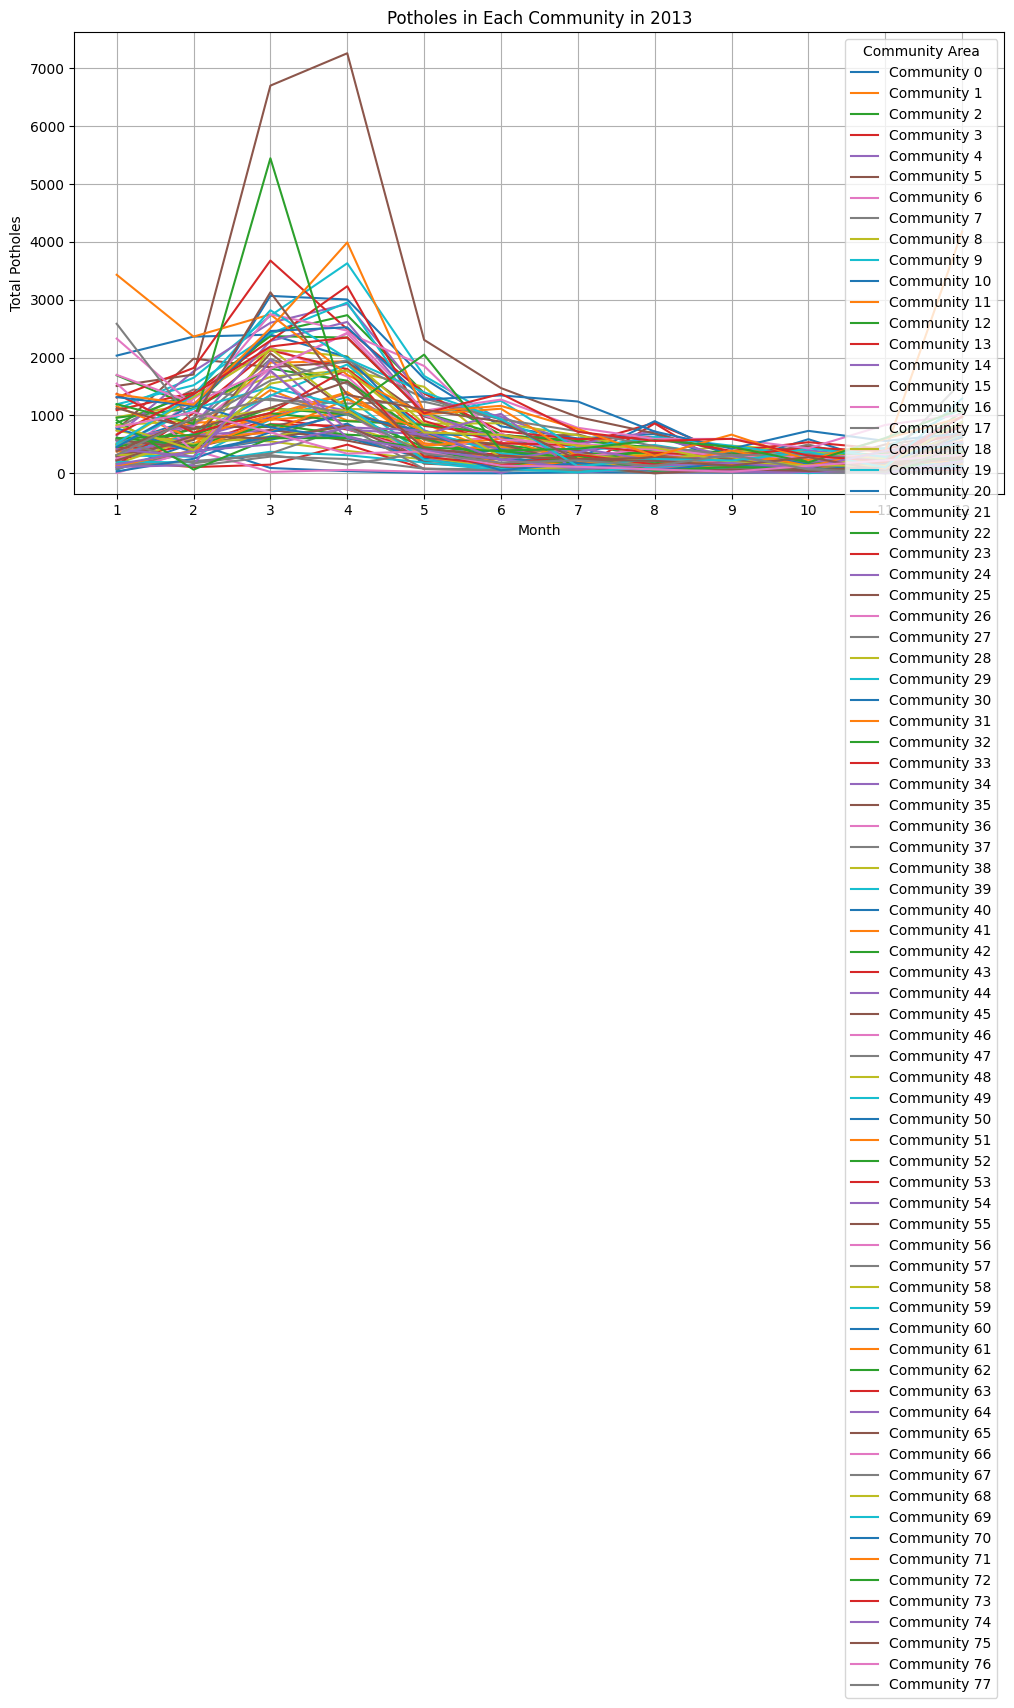

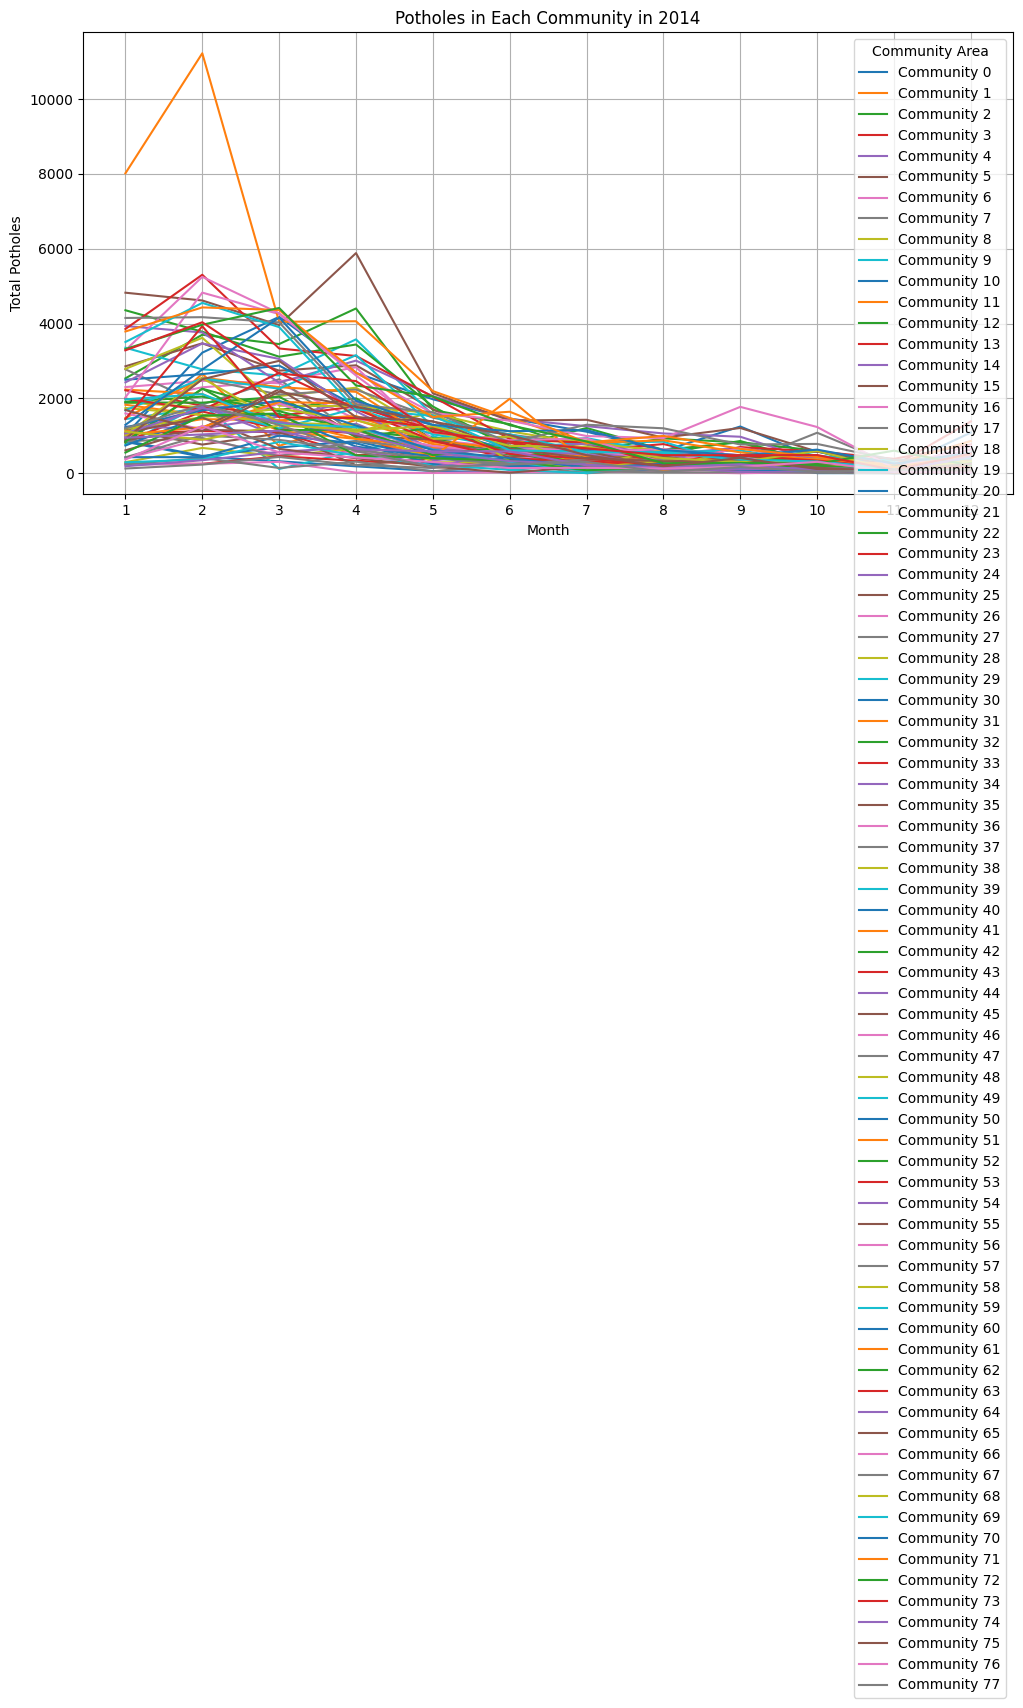

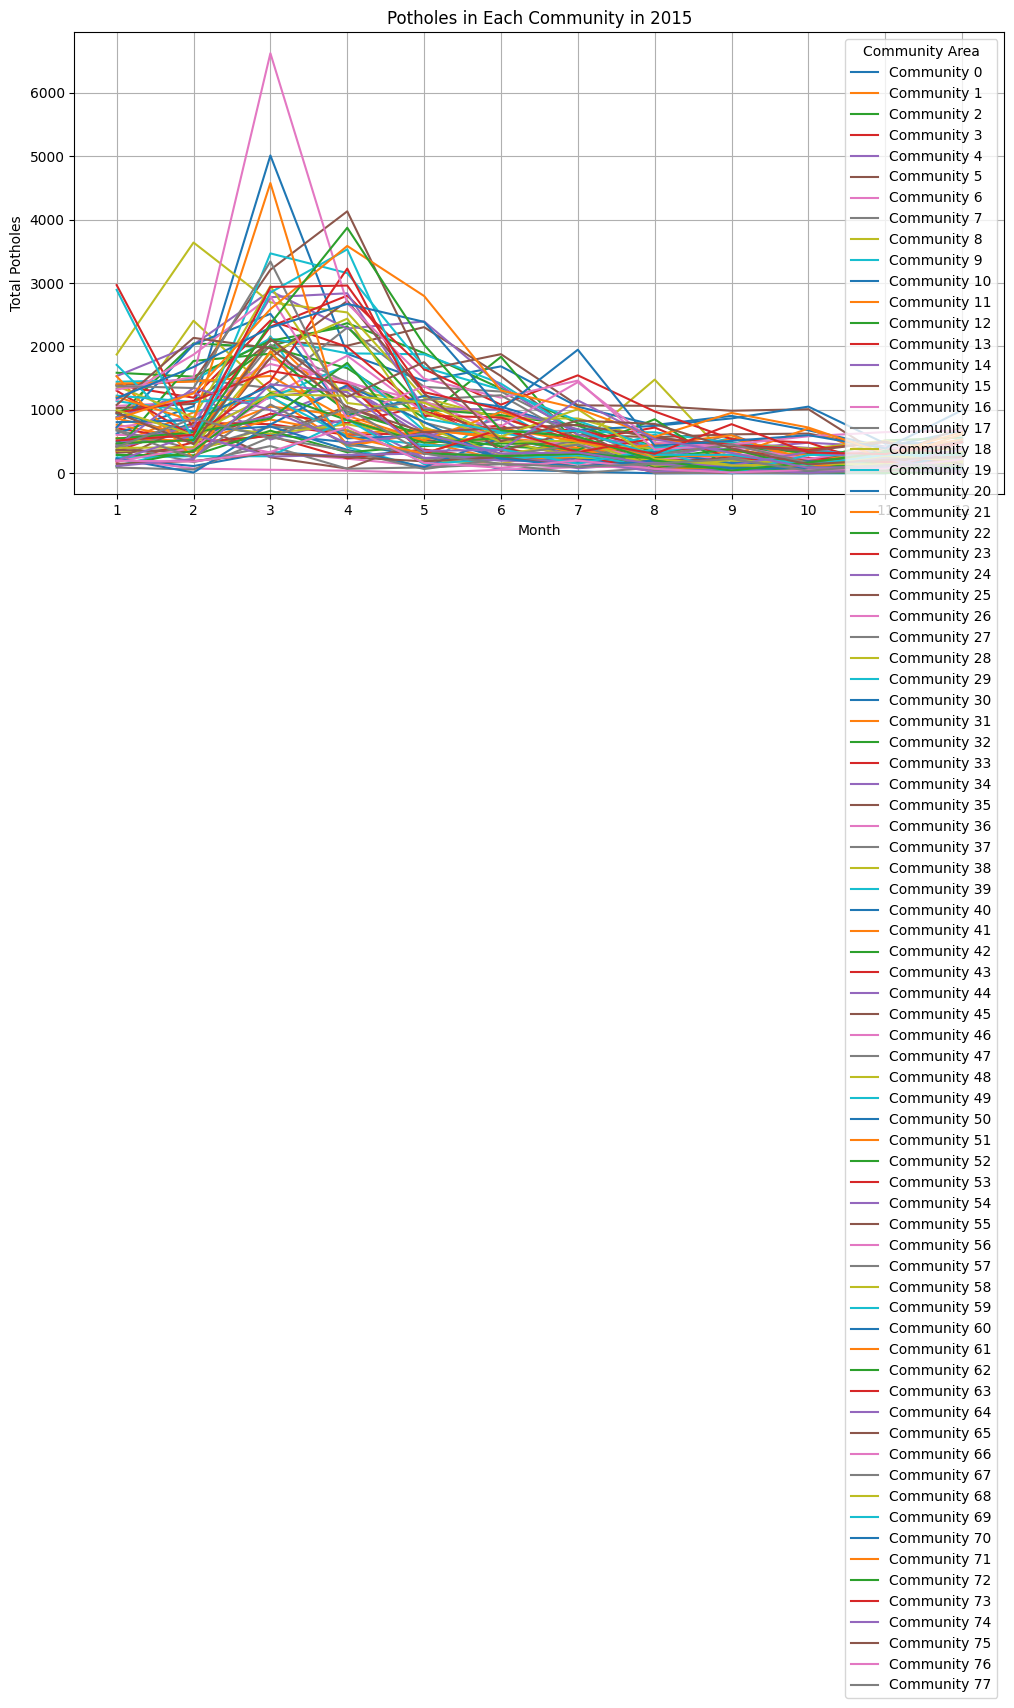

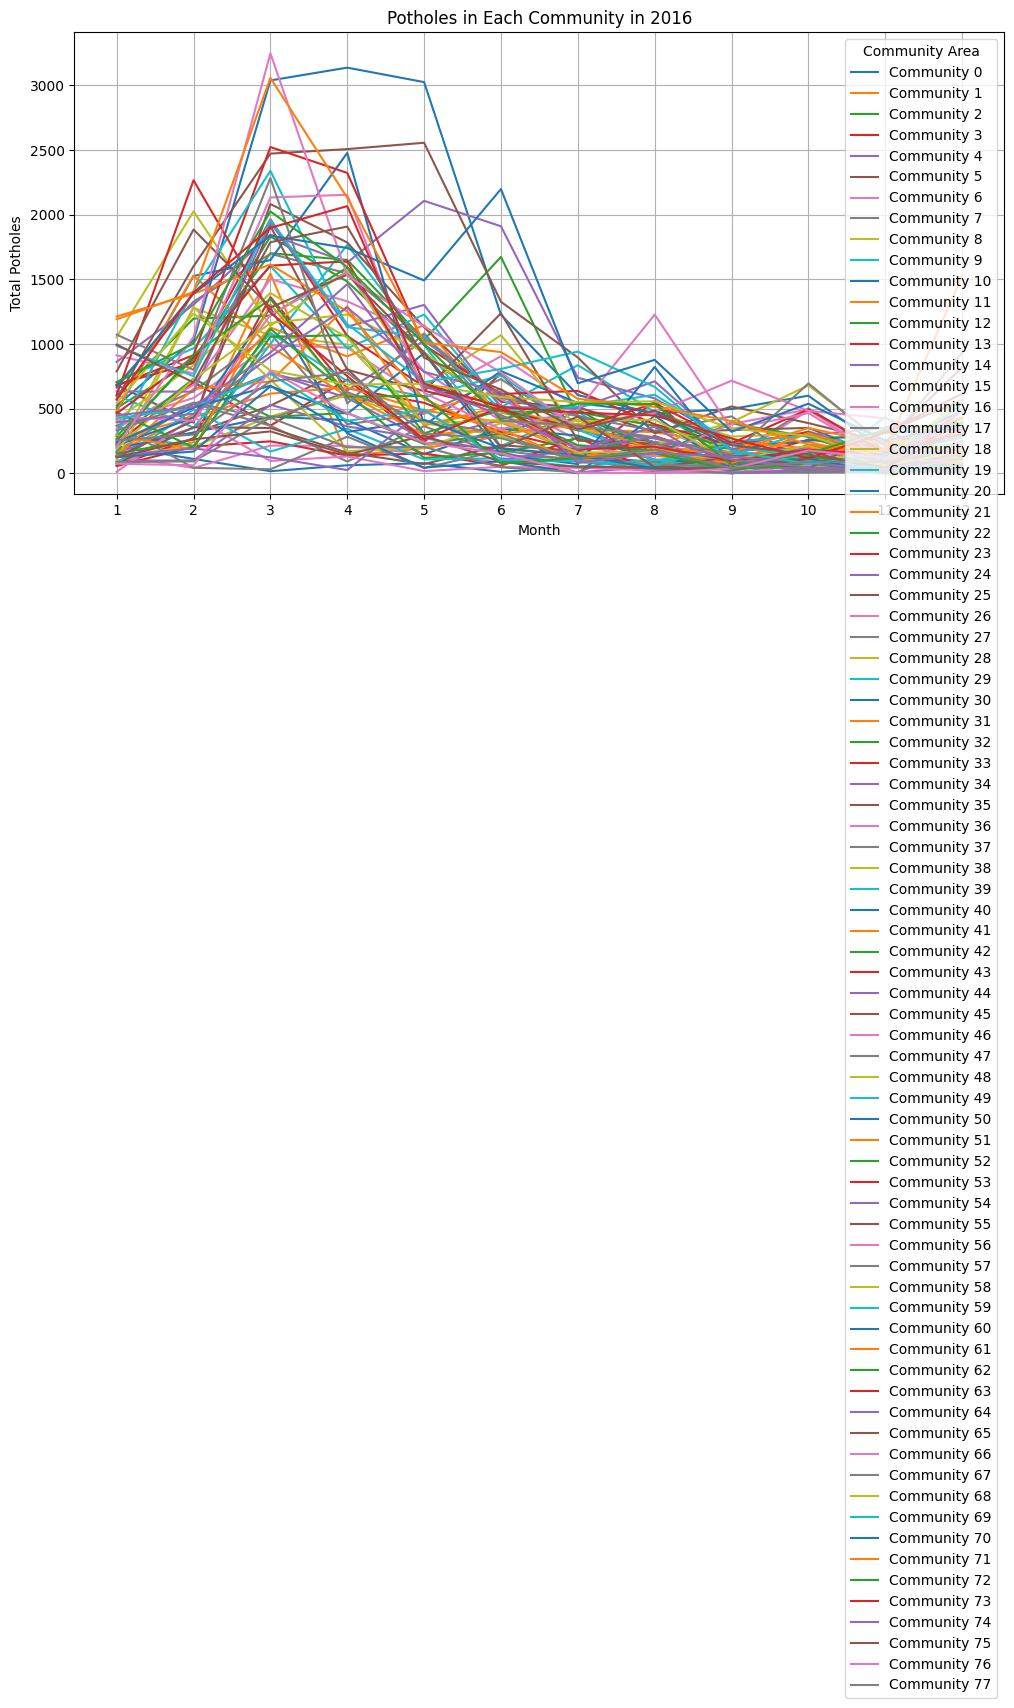

In [13]:
yearly_community_potholes = train_data.groupby(['Year', 'Month', 'community_area_number'])['n_potholes_on_block'].sum()
unique_years = train_data['Year'].unique()
for year in unique_years:
    year_data = yearly_community_potholes.xs(year, level='Year')
    plt.figure(figsize=(12, 6))
    unique_communities = year_data.index.get_level_values('community_area_number').unique()
    for community in unique_communities:
        community_data = year_data[year_data.index.get_level_values('community_area_number') == community]
        plt.plot(community_data.index.get_level_values('Month'), community_data.values, label=f'Community {community}')
    plt.xlabel('Month')
    plt.ylabel('Total Potholes')
    plt.title(f'Potholes in Each Community in {year}')
    plt.xticks(range(1, 13)) 
    plt.legend(loc='best', title='Community Area')
    plt.grid()
    plt.show()


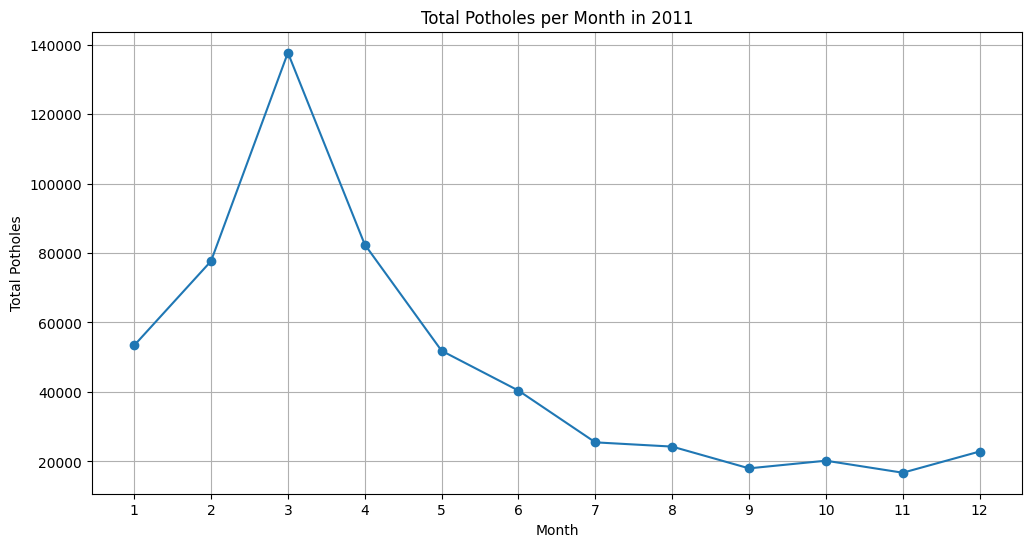

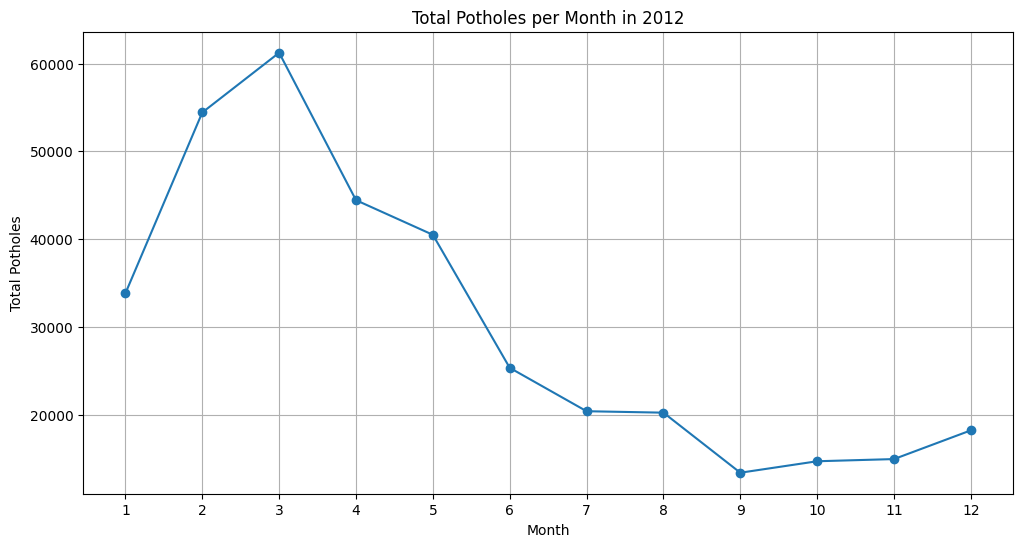

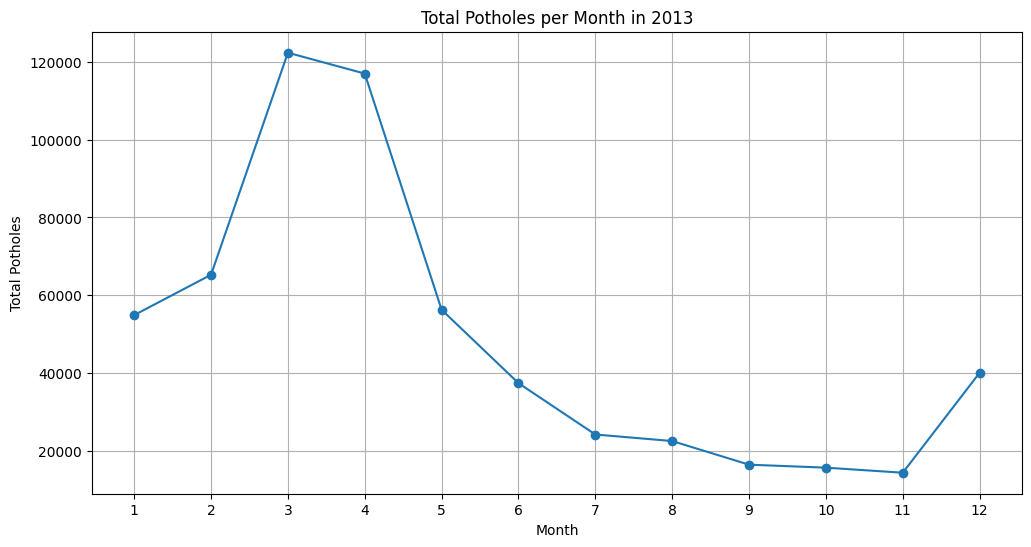

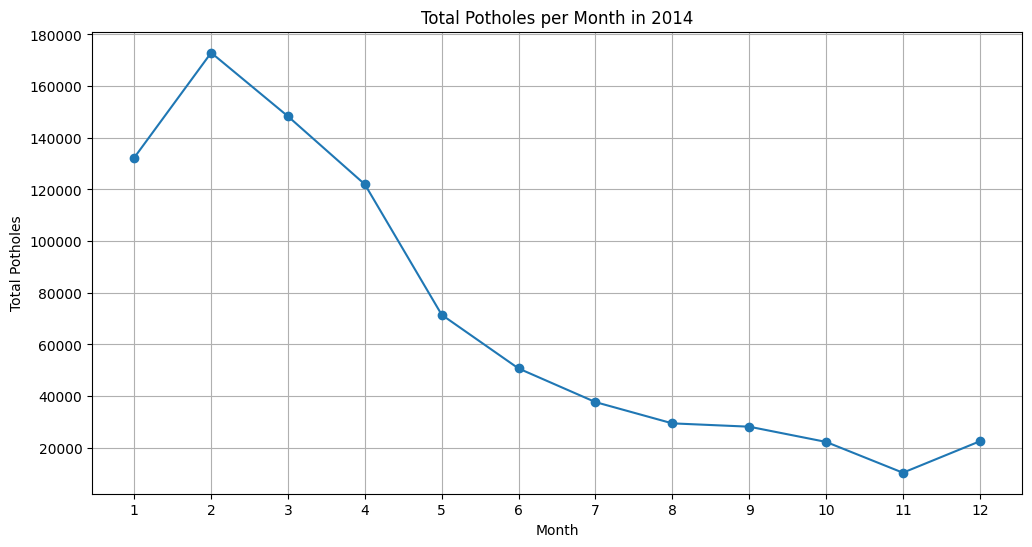

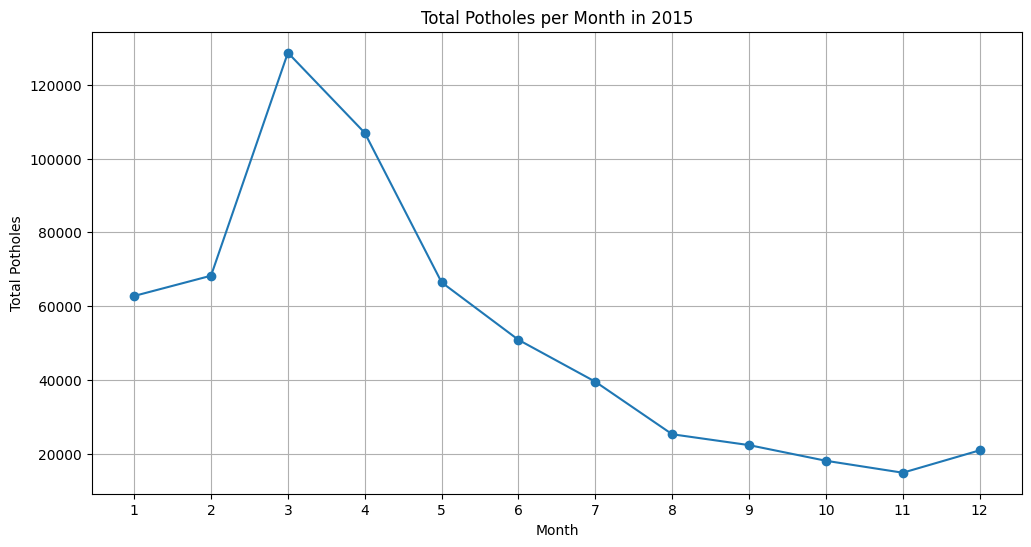

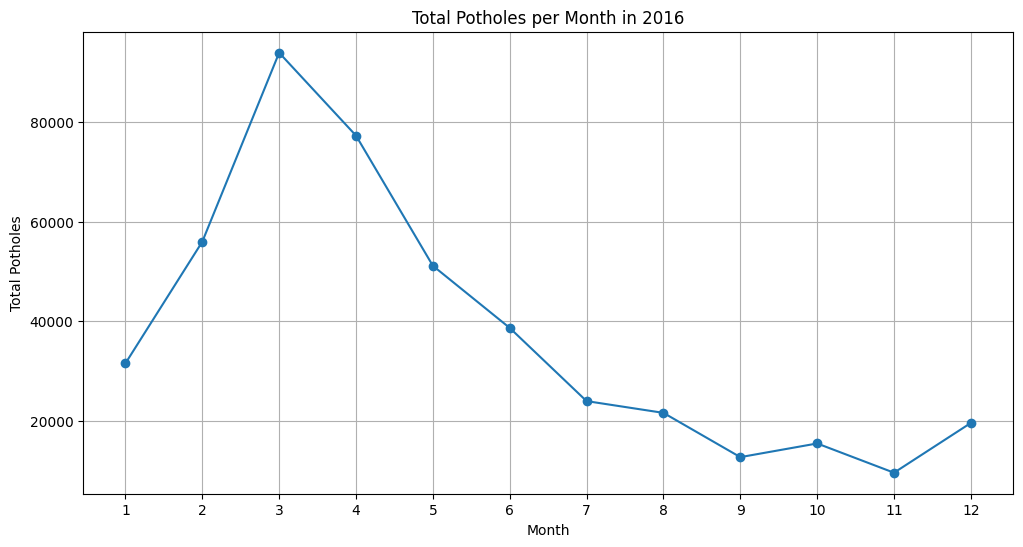

In [14]:

yearly_monthly_potholes = train_data.groupby(['Year', 'Month'])['n_potholes_on_block'].sum()
unique_years = train_data['Year'].unique()
for year in unique_years:
    year_data = yearly_monthly_potholes.xs(year, level='Year')
    plt.figure(figsize=(12, 6))
    plt.plot(year_data.index.get_level_values('Month'), year_data.values, marker='o', linestyle='-')
    
    plt.xlabel('Month')
    plt.ylabel('Total Potholes')
    plt.title(f'Total Potholes per Month in {year}')
    plt.xticks(range(1, 13)) 
    plt.grid()
    plt.show()


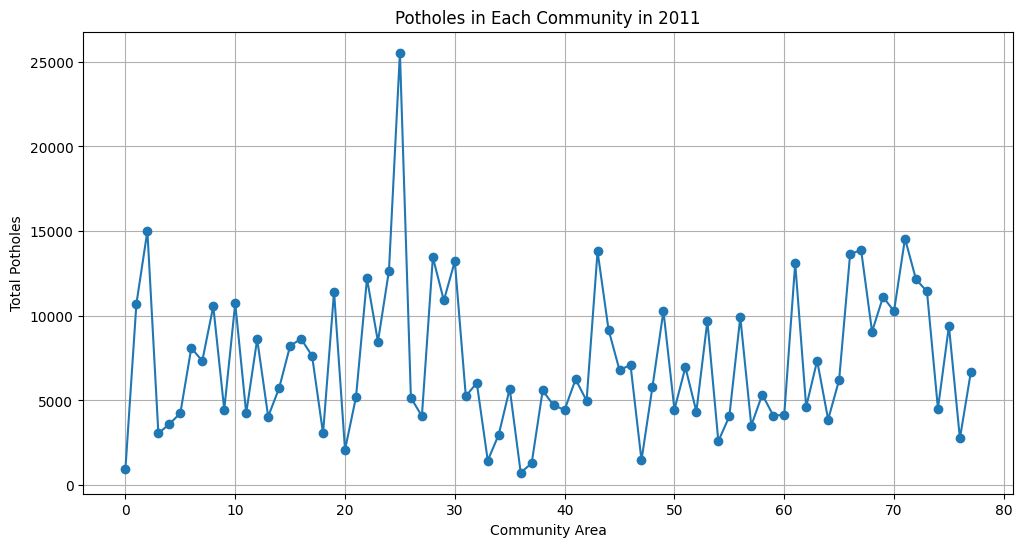

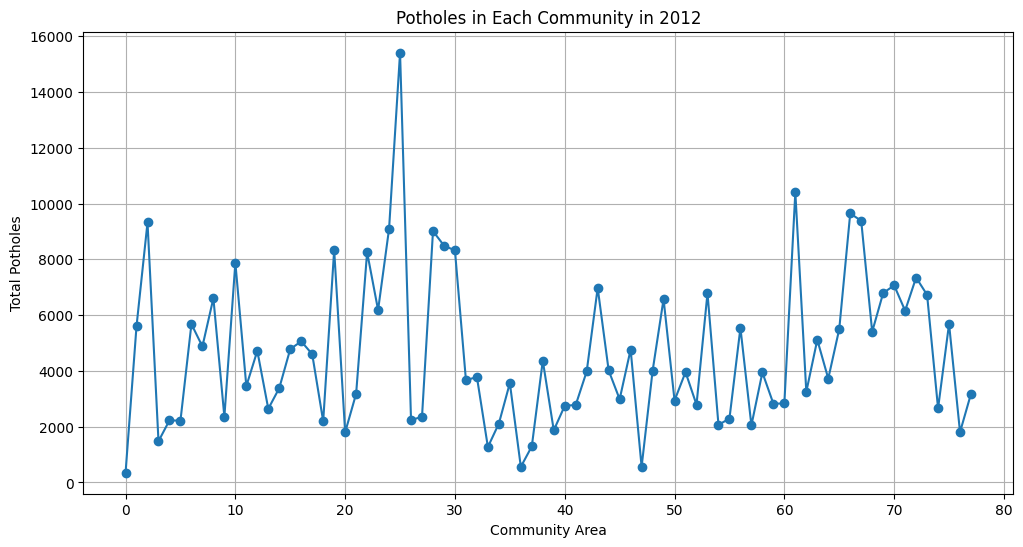

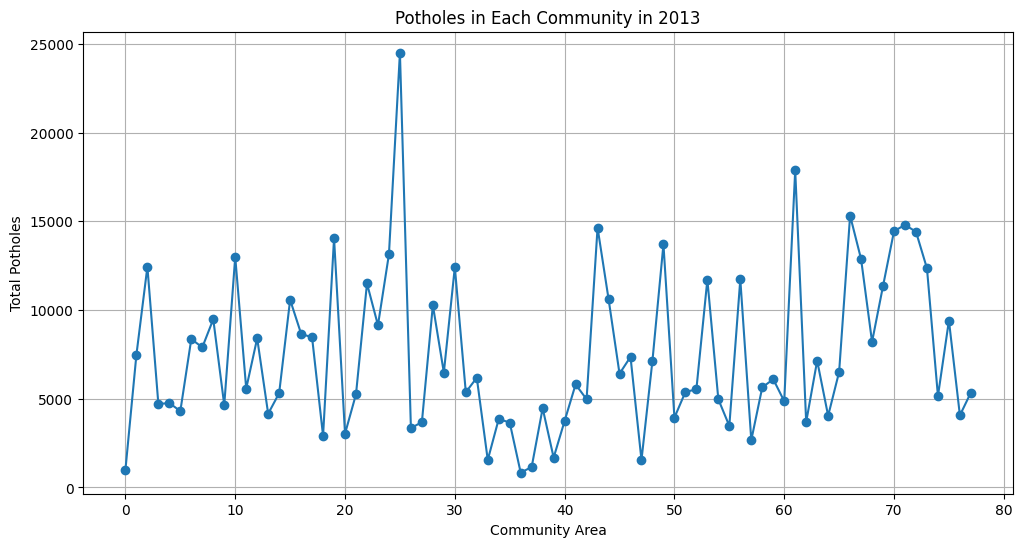

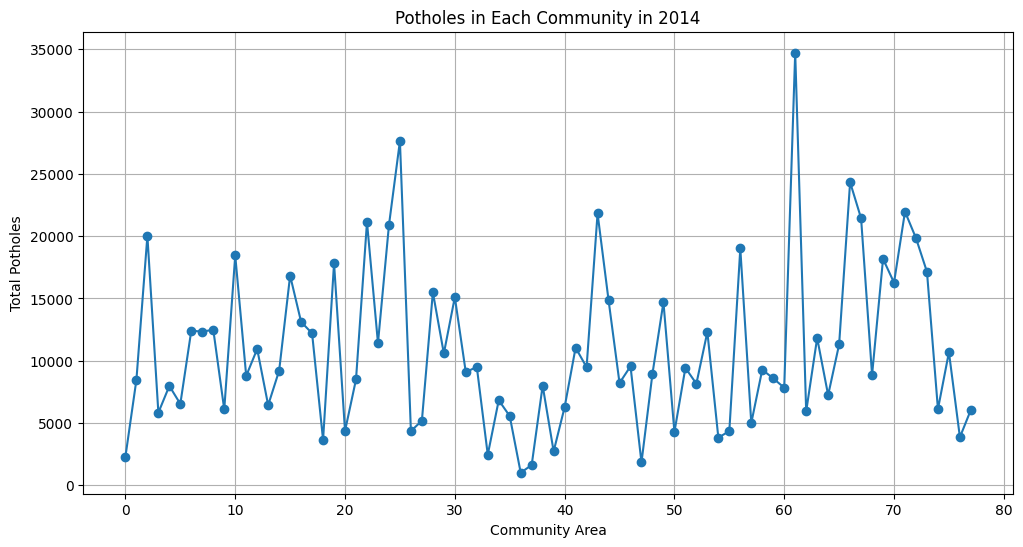

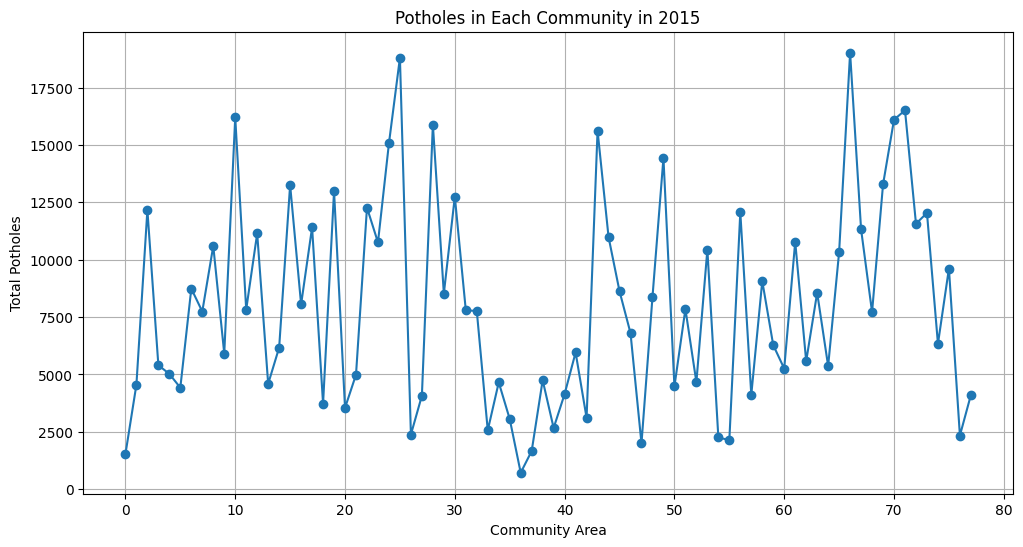

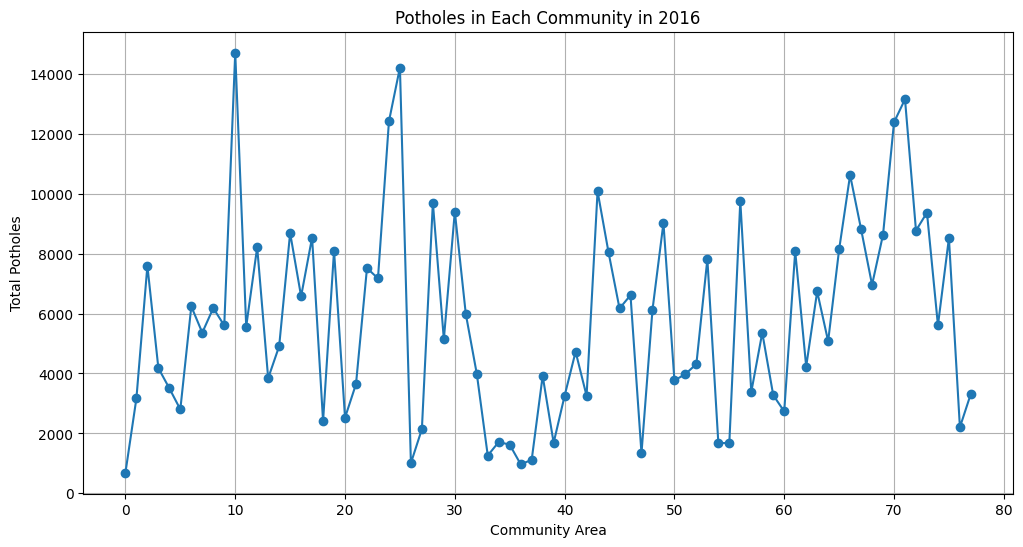

In [15]:
unique_years = train_data['Year'].unique()
for year in unique_years:
    year_data = train_data[train_data['Year'] == year]
    community_potholes = year_data.groupby('community_area_number')['n_potholes_on_block'].sum()
    plt.figure(figsize=(12, 6))
    plt.plot(community_potholes.index, community_potholes.values, marker='o', linestyle='-')
    
    plt.xlabel('Community Area')
    plt.ylabel('Total Potholes')
    plt.title(f'Potholes in Each Community in {year}')
    plt.grid()
    plt.show()


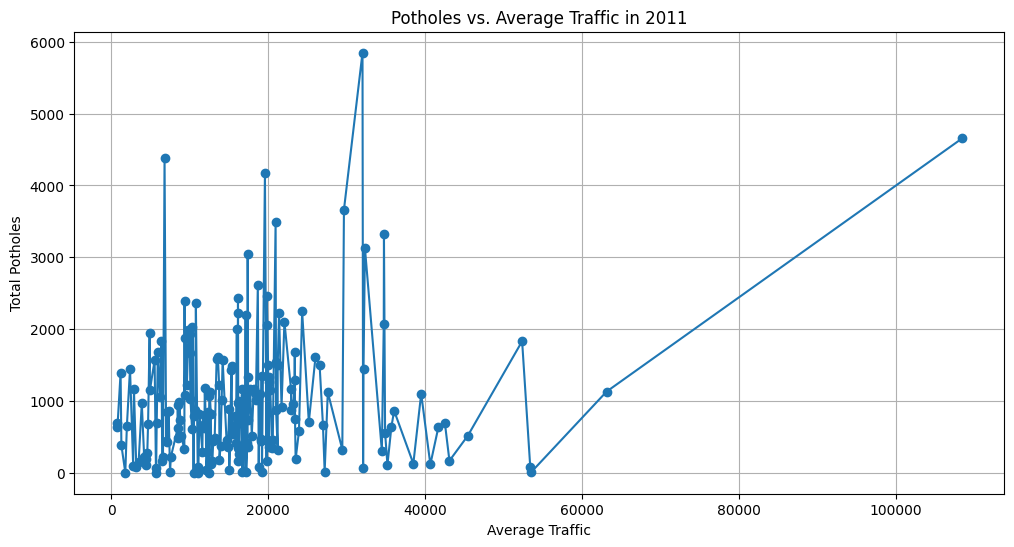

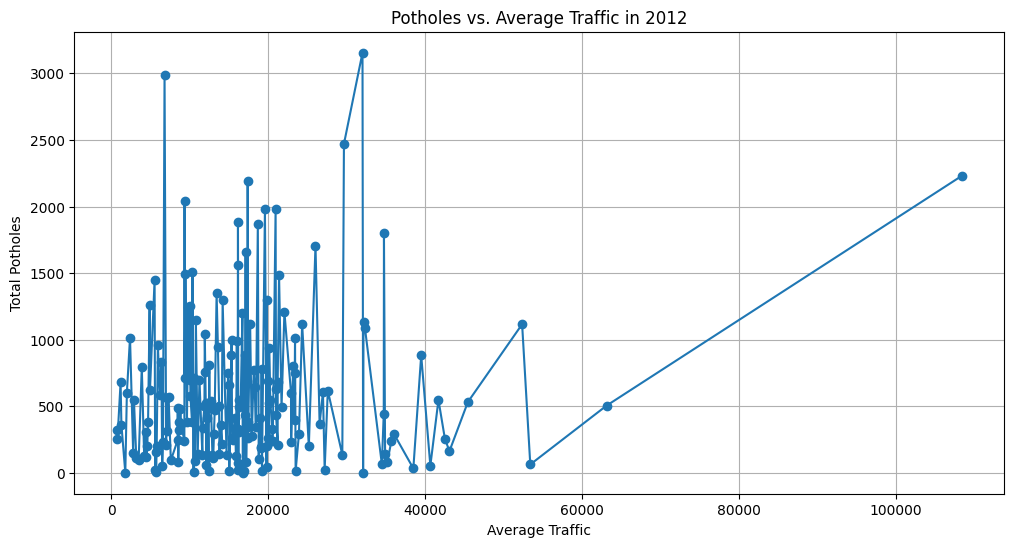

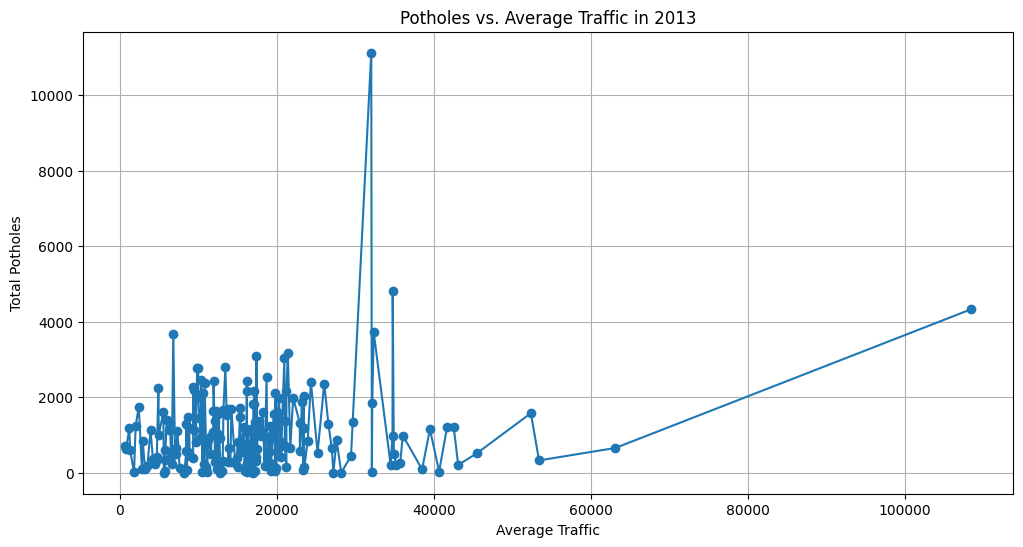

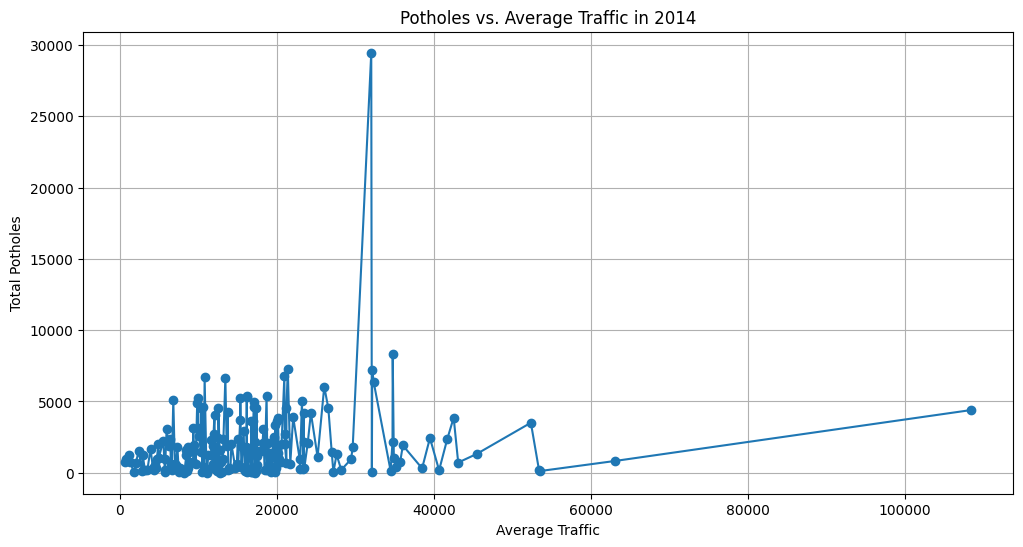

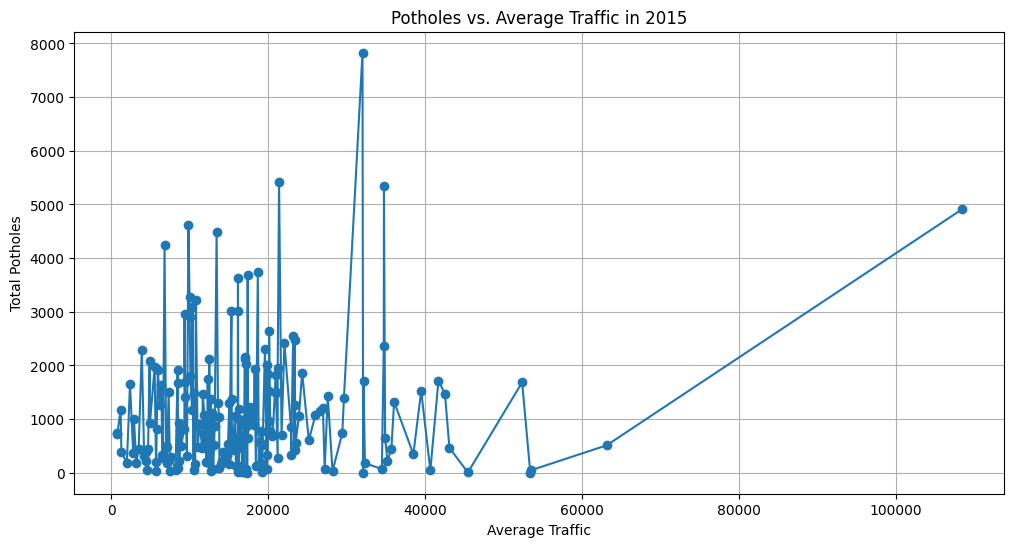

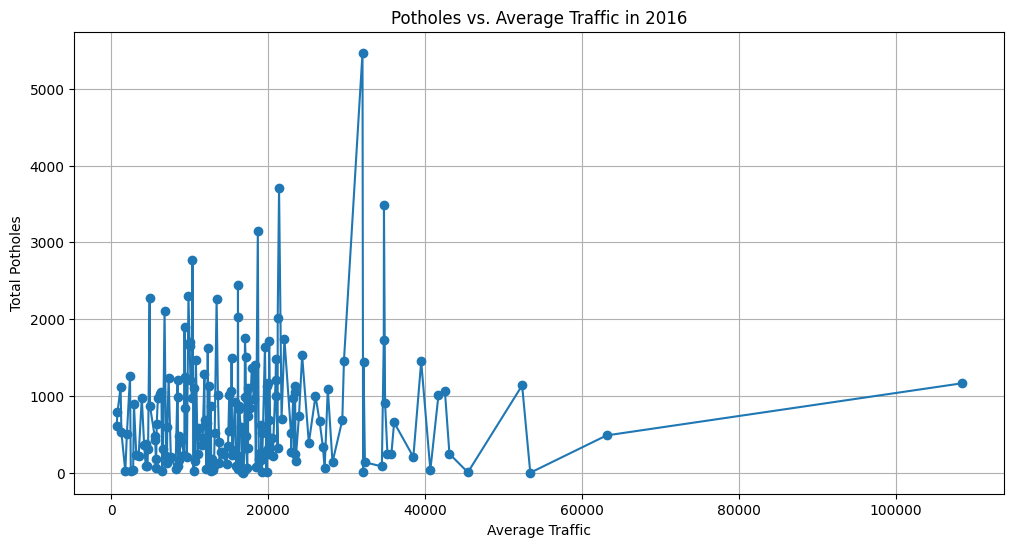

In [16]:
unique_years = train_data['Year'].unique()
for year in unique_years:
    year_data = train_data[train_data['Year'] == year]
    traffic_potholes = year_data.groupby('avg_traffic')['n_potholes_on_block'].sum()
    plt.figure(figsize=(12, 6))
    plt.plot(traffic_potholes.index, traffic_potholes.values, marker='o', linestyle='-')
    plt.xlabel('Average Traffic')
    plt.ylabel('Total Potholes')
    plt.title(f'Potholes vs. Average Traffic in {year}')
    plt.grid()
    plt.show()


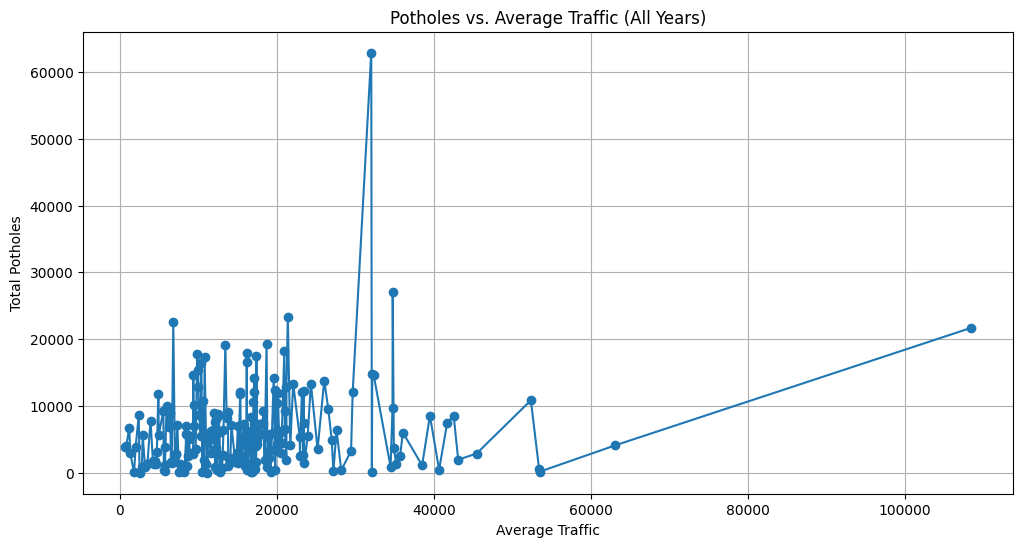

In [17]:
traffic_potholes = train_data.groupby('avg_traffic')['n_potholes_on_block'].sum()
plt.figure(figsize=(12, 6))
plt.plot(traffic_potholes.index, traffic_potholes.values, marker='o', linestyle='-')
plt.xlabel('Average Traffic')
plt.ylabel('Total Potholes')
plt.title('Potholes vs. Average Traffic (All Years)')
plt.grid()
plt.show()

In [18]:
train_data = pd.read_csv("training.csv")

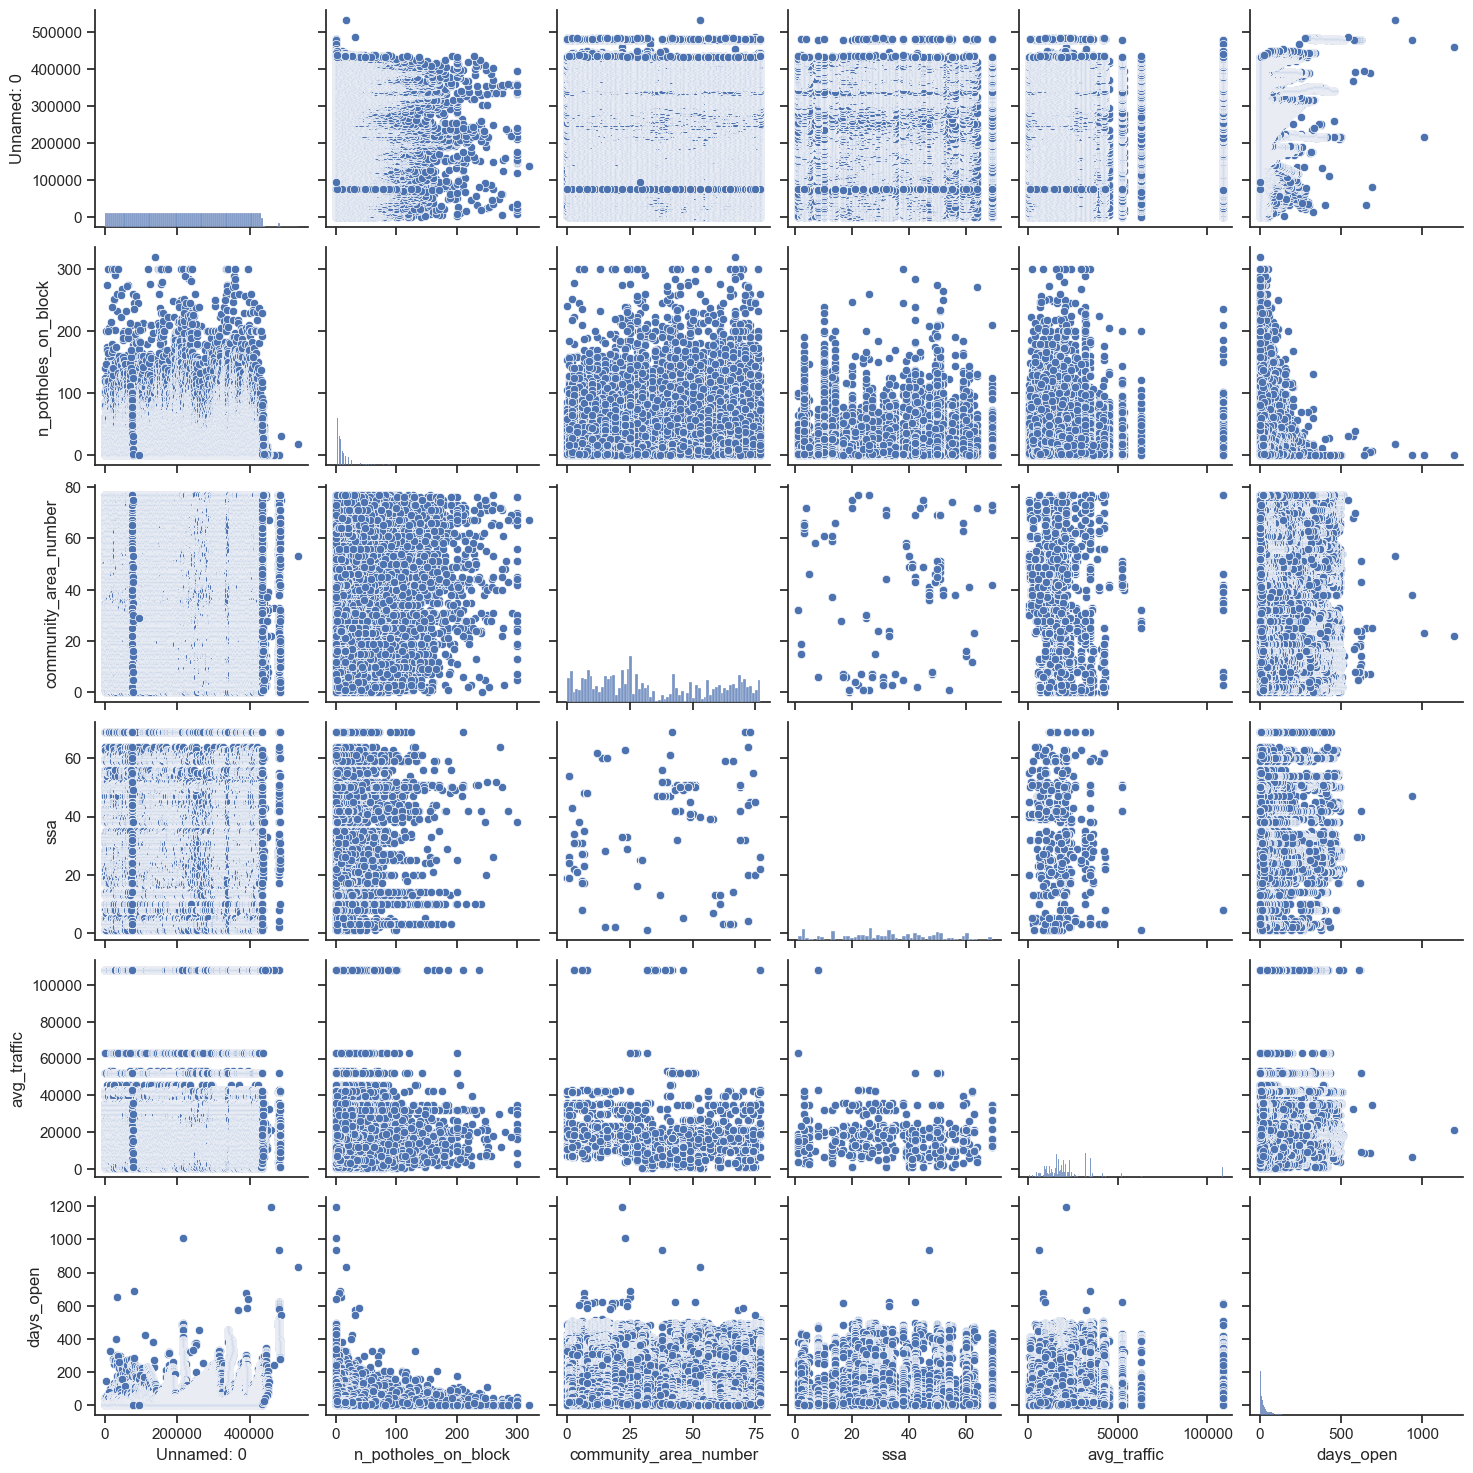

In [19]:
sns.set(style="ticks")
sns.pairplot(train_data)
plt.show()

In [20]:
train_data.columns

Index(['Unnamed: 0', 'creation_date', 'completion_date', 'request_number',
       'outcome', 'n_potholes_on_block', 'address', 'community_area_number',
       'ssa', 'avg_traffic', 'days_open'],
      dtype='object')

In [21]:
train_data['outcome'].value_counts()

pothole        272123
no_problem      26745
transferred     10021
bad_request       977
Name: outcome, dtype: int64

In [22]:
zero_count = (train_data['n_potholes_on_block'] == 0).sum()
print(f"Number of 0 values in 'column_name': {zero_count}")

Number of 0 values in 'column_name': 68908


In [23]:
nan_values = train_data.isna().sum()
nan_values

Unnamed: 0                    0
creation_date                 0
completion_date               0
request_number                0
outcome                  127278
n_potholes_on_block      120424
address                       0
community_area_number         0
ssa                      368311
avg_traffic              250404
days_open                     0
dtype: int64

In [24]:
len(train_data)

437144

In [25]:
train_data['outcome'].value_counts()

pothole        272123
no_problem      26745
transferred     10021
bad_request       977
Name: outcome, dtype: int64